In [1]:
# !unzip 2.zip

In [8]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.sequence import pad_sequences
# import preprocess as prep
import h5py
import unicodedata
import json

%matplotlib inline

In [9]:
import pathlib
import glob
import os
import shutil

In [4]:
# !sudo pip install mahotas

In [10]:
import imutils
import mahotas

In [11]:
ROOT ='./Data'
TRAIN_DIR = os.path.join(ROOT, '0916_Data Samples 2-20200109T093136Z-001')
TEST_DIR = os.path.join(ROOT, '0825_DataSamples 1')
TRAIN_PRE = os.path.join(ROOT, 'Train')
# os.mkdir(TRAIN_DIR)
# os.mkdir(TEST_DIR)

In [12]:
path = pathlib.Path(TRAIN_DIR, '')

all_file_path = path.rglob('*/*')
all_file_path = list(all_file_path)
all_file_path = [str(path) for path in list(all_file_path)]

In [13]:
len(all_file_path)

1479

In [14]:
# all_file_path = [path for path in all_file_path if os.path.isfile(path)] 

In [15]:
# To remove any file is not image
all_file_path = [m for m in all_file_path if m.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(len(all_file_path))
all_file_path[:5]

1477


['Data/0916_Data Samples 2-20200109T093136Z-001/0916_Data Samples 2/1212_samples.png',
 'Data/0916_Data Samples 2-20200109T093136Z-001/0916_Data Samples 2/1118_samples.png',
 'Data/0916_Data Samples 2-20200109T093136Z-001/0916_Data Samples 2/1644_samples.png',
 'Data/0916_Data Samples 2-20200109T093136Z-001/0916_Data Samples 2/1807_samples.png',
 'Data/0916_Data Samples 2-20200109T093136Z-001/0916_Data Samples 2/0531_samples.png']

In [16]:
# print(len(all_file_path_new))
# for i in all_file_path:
#     if i not in all_file_path_new:
#         print(i)

In [17]:
# # Testing processing img with only one img for saving time
# import random
# random.seed(42)

# test_image = random.choice(all_file_path)
# test_image

# # shutil.copy(test_image, str(TRAIN_DIR))

In [18]:
def _get_data(type_):
    ''' Build tf dataset form already repreocessing file'''
    data_path = os.path.join('.', 'Data', '{}.hdf5'.format(type_))
    dataset = dict()
    with h5py.File(data_path, 'r') as f:
        dataset['image'] = f['image'][:]
        dataset['label'] = f['label'][:]
        
        size = len(dataset['label'])
        dataset['label'] = [x.decode() for x in dataset['label']]
        
        return dataset, size

In [19]:
def get_label(path):
    labels = json.load(open(os.path.join(path, 'labels.json')))
    return labels

all_labels = get_label(TRAIN_DIR)
# lables = json.load(open(os.path.join('.', 'Data', '{}.json'.format('labels'))))

In [20]:
all_img_labels = []

for i in all_file_path:
    key = i.split('/')[-1]
    if key in all_labels:
        all_img_labels.append(all_labels[key])

len(all_img_labels)

1476

In [21]:
remove_path = []
for i in all_file_path:
    key = i.split('/')[-1]
    if key not in all_labels:
        remove_path.append(i)
        
remove_path

['Data/0916_Data Samples 2-20200109T093136Z-001/0916_Data Samples 2/.ipynb_checkpoints/0000_samples-checkpoint.png']

In [22]:
for i in remove_path:
    all_file_path.remove(i)

In [23]:
assert len(all_img_labels) == len(all_file_path)

<function matplotlib.pyplot.show(*args, **kw)>

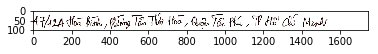

In [24]:
import random
random.seed(42)

test_imge = random.choice(all_file_path)
image = cv2.imread(test_imge)           
plt.imshow(image)
plt.show

# r = image.shape[1] // image.shape[0]
# dim = (500*r, 500)
# resize = cv2.resize(image, dim)
# print(resize.shape)

In [25]:
res = []

for label in all_img_labels:
    for word in label:
        if word not in res:
            res.append(word)

In [26]:
test_label = []

for key in get_label(TEST_DIR):
    value = get_label(TEST_DIR)[key]
    test_label.append(value)

test_label

['Up coworking Space, 89 Láng Hạ, Hà Nội',
 'Số 30 Nguyên Hồng, Láng Hạ, Đống Đa, Hà Nội',
 '58 Thái Thịnh, Đống Đa, Hà Nội',
 '192 Ngô Đức Kế, quận 1, Hồ Chí Minh',
 'Số 370/8 khu phố 5B, phường Tân Biên, Biên Hòa, Đồng Nai',
 '168 Ngô Gia Tự, thành phố Hà Tĩnh',
 'phòng 101, tầng 1, lô 04-TT5B, khu đô thị Tây Nam Linh Đàm',
 'số 5 Công Trường Mê Linh, phường Bến Nghé, quận 1',
 'Số 3 Nguyễn Ngọc Vũ, Hà Nội',
 '90A đường Mai Xuân Thưởng, tỉnh Gia Lai',
 'Tòa nhà 34T, Hoàng Đạo Thúy, Hà Nội',
 'Nhà 87 ngõ 416 Đê La Thành',
 'Vĩnh Trung Plaza, B, 255-257 đường Hùng Vương, phường Vĩnh Trung',
 '96/7/12B Phạm Văn Đồng, thành phố Pleiku',
 '40 Cát Linh, Đống Đa, Hà Nội']

In [27]:
test_res = []

for label in test_label:
    for word in label:
        if word not in test_res:
            test_res.append(word)

test_char = ''.join(sorted(test_res))


In [30]:
for i in test_res:
    if i not in res:
        res.append(i)

charset = ''.join(sorted(res))
print( len(charset), charset)

139  #'()+,-./0123456789ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ


In [31]:
a = '#()+,-./:0123456789ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstwuvxyzÂÊÔàáâãèéêẹìíòóôõùúýăĐđĩũƠơưạảấầẩẫậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ'
print(len(a))

140


In [32]:
char2text = {values: key for key, values in enumerate(charset)}
char_array = np.array(sorted(charset))
char_array

array([' ', '#', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
       'T', 'U', 'V', 'W', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'g', 'h',
       'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z', 'Â', 'Ê', 'Ô', 'à', 'á', 'â', 'ã', 'è', 'é',
       'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'ă', 'Đ', 'đ',
       'ĩ', 'ũ', 'Ơ', 'ơ', 'ư', 'ạ', 'ả', 'ấ', 'ầ', 'ẩ', 'ậ', 'ắ', 'ằ',
       'ẵ', 'ặ', 'ẻ', 'ẽ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ỉ', 'ị', 'ọ', 'ỏ',
       'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ụ', 'ủ', 'Ứ',
       'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ỳ', 'ỵ', 'ỷ', 'ỹ'], dtype='<U1')

In [33]:
text = all_img_labels[0]
text_encode = [char2text.get(x) for x in text]
print(text, 'encoding', text_encode)

Thôn Trung Thành, Xã Đông Động, Huyện Đông Hưng, Thái Bình encoding [39, 51, 83, 56, 0, 39, 60, 63, 56, 50, 0, 39, 51, 72, 56, 51, 6, 0, 43, 75, 0, 89, 83, 56, 50, 0, 89, 121, 56, 50, 6, 0, 27, 63, 67, 112, 56, 0, 89, 83, 56, 50, 0, 27, 95, 56, 50, 6, 0, 39, 51, 73, 52, 0, 21, 79, 56, 51]


In [34]:
def encode(text): 
    encode = [char2text.get(x) for x in text]
    return np.asarray(encode, dtype=np.int32)

def decode(text_encode):
    decode = ''.join([char_array[x] for x in text_encode])
    return decode

In [35]:
text_encode = encode(text)
decode = decode(text_encode)
print(text_encode)

[ 39  51  83  56   0  39  60  63  56  50   0  39  51  72  56  51   6   0
  43  75   0  89  83  56  50   0  89 121  56  50   6   0  27  63  67 112
  56   0  89  83  56  50   0  27  95  56  50   6   0  39  51  73  52   0
  21  79  56  51]


In [29]:
# for i in all_img_labels:
#     for word in i:
#         encode = char2text.get(word)
#         print(encode)

### PREPROCESSING

In [58]:
def preprocess_first(img_path):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (11,11), 0)
    edged = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)
    return edged


In [59]:
def resize(image):
        return cv2.resize(image, dsize=(1900, 120))


In [60]:
# def remove_cursive_style(img):
#     """Remove cursive writing style from image with deslanting algorithm"""

#     def calc_y_alpha(vec):
#         indices = np.where(vec > 0)[0]
#         h_alpha = len(indices)

#         if h_alpha > 0:
#             delta_y_alpha = indices[h_alpha - 1] - indices[0] + 1

#             if h_alpha == delta_y_alpha:
#                 return h_alpha * h_alpha
#         return 0

#     alpha_vals = [-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]
#     rows, cols = img.shape[:2]
#     results = []

#     ret, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     binary = otsu if ret < 127 else sauvola(img, (int(img.shape[0] / 2), int(img.shape[0] / 2)), 127, 1e-2)

#     for alpha in alpha_vals:
#         shift_x = max(-alpha * rows, 0.)
#         size = (cols + int(np.ceil(abs(alpha * rows))), rows)
#         transform = np.asarray([[1, alpha, shift_x], [0, 1, 0]], dtype=np.float)

#         shear_img = cv2.warpAffine(binary, transform, size, cv2.INTER_NEAREST)
#         sum_alpha = 0
#         sum_alpha += np.apply_along_axis(calc_y_alpha, 0, shear_img)
#         results.append([np.sum(sum_alpha), size, transform])

#     result = sorted(results, key=lambda x: x[0], reverse=True)[0]
#     warp = cv2.warpAffine(img, result[2], result[1], borderValue=255)

#     return cv2.resize(warp, dsize=(1900, 120))

(120, 1900) (102, 1854)


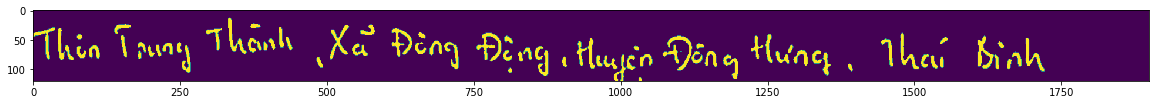

In [64]:
plt.figure(figsize=(20,10))
# test_path = './Data/0916_Data Samples 2-20200109T093136Z-001/0916_Data Samples 2/0000_samples.png'
test_img = preprocess_first(all_file_path[0])
re = resize(test_img)
plt.imshow(re)

print(re.shape, test_img.shape)

(120, 1900, 3)

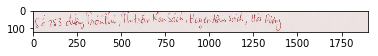

In [56]:
re = 

plt.imshow(re)


In [32]:
# max = (0, 0)
# for i in all_file_path:
#     test = cv2.imread(i)
#     if test.shape > max:
#         max = test.shape

# print(max)

(120, 1900)

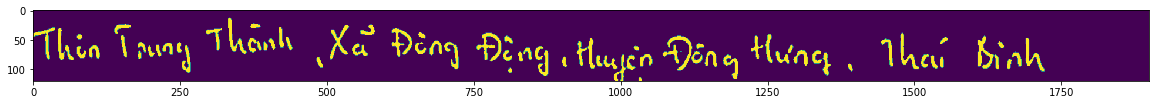

In [33]:
plt.figure(figsize=(20,10))
image = preprocess(all_file_path[0])
image = remove_cursive_style(image)
plt.imshow(image)

image.shape

In [121]:
TRAIN_NEW = './Data/Train'
VAL = './Data/Test'
# for i in all_file_path:
#     filename = i.split('/')[-1]
#     path = os.path.join(TRAIN_NEW, filename)
#     image = preprocess(i)
#     image = remove_cursive_style(image)
#     cv2.imwrite(path, image)


In [129]:
path = pathlib.Path(TRAIN_NEW, '')

all_file_path = path.glob('*.png')
all_file_path = list(all_file_path)
all_file_path = [str(path) for path in list(all_file_path)]

In [130]:
len(all_file_path)

1823

In [131]:
test_img = cv2.imread('./Data/Train/0287_samples.png')
test_img.shape

(120, 1900, 3)

In [133]:
len_data = len(all_file_path)
ratio = 0.1
len_train = int(len_data * (1- ratio))
len_val = len_data - len_train
print(len_train, len_val)

1640 183


In [134]:
# !rm -rf Data/Test/*

In [135]:
import shutil

train_path = all_file_path[:len_train]
val_path = all_file_path[len_train:]

for i in val_path:
    shutil.move(i, VAL)

In [140]:
train_path = pathlib.Path(TRAIN_NEW)
train_path = train_path.glob('**/*')
train_path = [str(i) for i in train_path]
len(train_path)

1640

In [141]:
val_path = pathlib.Path(VAL)
val_path = val_path.glob('**/*')
val_path = [str(i) for i in val_path]
len(val_path)

183

In [138]:
def clean_ipynb_folder_if_exists(folder):
    folder = pathlib.Path(folder)
    ipynb_paths = [str(item) for item in folder.glob('**/*') if item.is_dir() and item.name.startswith('.ipynb')]
    if len(ipynb_paths) > 0:
        for eachdir in ipynb_paths:
            shutil.rmtree(eachdir)
            print("Removed", eachdir)
    else:
        print('No .ipynb_checkpoints to remove')

In [139]:
clean_ipynb_folder_if_exists(TRAIN_NEW)
clean_ipynb_folder_if_exists(VAL)

Removed Data/Train/.ipynb_checkpoints
No .ipynb_checkpoints to remove


In [143]:
train_label = []
val_label = []

for i in train_path:
    label = (i.split('/'))[-1]
    label = all_labels[label]
    train_label.append(label)
    
for i in val_path:
    label = (i.split('/'))[-1]
    label = all_labels[label]
    val_label.append(label)

In [144]:
print(len(train_label), len(val_label))

1640 183


### DATA GENERATOR

In [145]:
def preprocess_path(path):
    label = (path.split('/'))[-1]
    label = all_labels[label]
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     image = tf.image.per_image_standardization(image)
    image = image[:,:,1]
    image = np.expand_dims(image, axis=2)
    return np.array(image), label

In [146]:
a, b = preprocess_path(train_path[0])
# plt.imshow(a, cmap='gray')
# a.shape

In [115]:
# train_count = len(train_label)
# val_count = len(val_label)

# BATCH_SIZE = 64
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# def create_ds(images, labels, count):
#     ds = tf.data.Dataset.from_tensor_slices((images, labels))
#     ds = ds.repeat()
#     ds = ds.batch(BATCH_SIZE)
#     ds = ds.prefetch(buffer_size=AUTOTUNE)
    
#     return ds


### MODEL


In [147]:
training_img = []
for i in train_path:
    image =  preprocess_path(i)[0]
    training_img.append(image)


In [148]:
training_img[0].shape

(120, 1900, 1)

In [149]:
train_label_len = []
train_txt = []


for i in train_label:
    text_encode = encode(i)
    train_txt.append(list(text_encode))
    train_label_len.append(len(text_encode))

len(train_label_len)

1640

In [150]:
valid_img = []
for i in val_path:
    image =  preprocess_path(i)[0]
    valid_img.append(image)

In [151]:
valid_img[1].shape

(120, 1900, 1)

In [152]:
valid_label_len = []
valid_txt =[]

for i in val_label:
    text_encode = encode(i)
    valid_txt.append(list(text_encode))
    valid_label_len.append(len(text_encode))

max(valid_label_len)

69

In [153]:
# import our model, different layers and activation function 
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [154]:
# OUR FULL MODEL OF CRNN AND LSTM

# YOUR PART: TRY TO BUILD YOUR DIFFERENT TIMESTEPS AND BUILD TO DO IT, LET SAY 26 OR 32 INSTEAD OF 31 LIKE BELOW. 

# input with shape of height=118 and width=1875 
inputs = Input(shape=(120,1900,1))   # (118,1875,3)
 
# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)  # (120,1900,64)

# poolig layer with kernel size (2,2) to make the height/2 and width/2  # (60,950,64)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)

conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)  # (60,950,128)

# poolig layer with kernel size (2,2) to make the height/2 and width/2   # (30,475,128)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)
 
conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)   # (30,475,256)
 
conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)   # (30,475,256)

# poolig layer with kernel size (2,2) to make the height/2              # (15,95,256)
pool_4 = MaxPool2D(pool_size=(2, 5))(conv_4)
 
conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)  # (15,95,512)

# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)
 
conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)  # (15,95,512)
batch_norm_6 = BatchNormalization()(conv_6)

# poolig layer with kernel size (2,2) to make the height/2       # (15,95,512)
pool_6 = MaxPool2D(pool_size=(5, 1))(batch_norm_6)

# didn't have padding = "same" to reduce timestep - 1 because kernel size is # (1,95,512)
conv_7 = Conv2D(512, (3,1), activation = 'relu')(pool_6)
 
# to remove the first dimension of one: (1, 95, 512) to (95, 512) 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
 
# bidirectional LSTM layers with units=95
blstm_1 = Bidirectional(LSTM(95, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(95, return_sequences=True, dropout = 0.2))(blstm_1)

# this is our softmax character proprobility with timesteps (31, 63)
outputs = Dense(len(char_array)+1, activation = 'softmax')(blstm_2)

# model to be used at test time

act_model = Model(inputs, outputs)

In [155]:
act_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 1900, 1)]    0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 1900, 64)     640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 950, 64)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 950, 128)      73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 475, 128)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 475, 256)      295168    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 475, 256)      5900

In [156]:
max_label_len = 70

# define the label input shape for ctc
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')

# define a ctc lambda function to take arguments and return ctc_bach_cost
# define the length of input and label for ctc
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    """
    labels: tensor (number of samples, max_string_length) containing the truth labels.
    y_pred: tensor (number of samples, time_steps, num_character_labels) containing the prediction, or output of the softmax.
    input_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_pred.
    label_length: tensor (number of samples, 1) containing the sequence length for each batch item in y_true.
    """
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

# out loss function (just take the inputs and put it in our ctc_batch_cost)
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [157]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 120, 1900, 1 0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 120, 1900, 64 640         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 60, 950, 64)  0           conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 60, 950, 128) 73856       max_pooling2d_4[0][0]            
____________________________________________________________________________________________

In [165]:
# ready ctc loss function and optimizersval
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

# ready out check point save file
filepath="Khanh.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='auto')
callbacks_list = [checkpoint]

In [159]:
def pad(sequence):
    MAXLEN = 70
    sequence = list(sequence)
    sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=MAXLEN, padding='post')
    return sequence

In [160]:
# ready our training data
training_img = np.array(training_img)
train_padded_txt = pad(train_txt)
train_input_len = np.ones(len(training_img))*95  # must be equal length to T timesteps = 95
train_label_len = np.array(train_label_len)  # different length


# ready our test data
valid_img = np.array(valid_img)
valid_padded_txt = pad(valid_txt)
valid_input_len = np.ones(len(valid_img))*95 # must be equal length to T timesteps = 95
valid_label_len = np.array(valid_label_len) # different length

In [166]:
# choose batchsize and epochs
batch_size = 32
epochs = 10
model.fit(x=[training_img, train_padded_txt, train_input_len, train_label_len], 
          y=np.zeros(len(training_img)), 
          batch_size=batch_size, 
          epochs = epochs, 
          validation_data = ([valid_img, valid_padded_txt, valid_input_len, valid_label_len], [np.zeros(len(valid_img))]), 
          verbose = 1, 
          callbacks = callbacks_list)

Train on 1640 samples, validate on 183 samples
Epoch 1/10
1632/1640 [============================>.] - ETA: 0s - loss: 1.4671
Epoch 00001: saving model to Khanh.hdf5
1640/1640 [==============================] - 24s 14ms/sample - loss: 1.4688 - val_loss: 35.7833
Epoch 2/10
1632/1640 [============================>.] - ETA: 0s - loss: 2.2038
Epoch 00002: saving model to Khanh.hdf5
1640/1640 [==============================] - 16s 10ms/sample - loss: 2.2079 - val_loss: 39.1510
Epoch 3/10
1632/1640 [============================>.] - ETA: 0s - loss: 1.9767
Epoch 00003: saving model to Khanh.hdf5
1640/1640 [==============================] - 16s 10ms/sample - loss: 1.9767 - val_loss: 38.1586
Epoch 4/10
1632/1640 [============================>.] - ETA: 0s - loss: 1.5531
Epoch 00004: saving model to Khanh.hdf5
1640/1640 [==============================] - 16s 10ms/sample - loss: 1.5562 - val_loss: 36.3145
Epoch 5/10
1632/1640 [============================>.] - ETA: 0s - loss: 1.3748
Epoch 00005: s

In [61]:
# save our model
# model.save('Khanh.h5')

In [167]:
# load the saved best model weights
act_model.load_weights('Khanh.hdf5')

# predict outputs on validation images
prediction = act_model.predict(valid_img[:10])

In [170]:
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
 
# see the results
i = 0
for x in out:
    print("original_text =  ", val_label[i])
    print("predicted text = ", end = '')
    for p in x:  
        if int(p) != -1:
            print(charset[int(p)], end = '')       
    print('\n')
    i+=1

original_text =   73 Kỳ Đồng, Phường Thanh Khê Đông, Quận Thanh Khê, Đà Nẵng
predicted text = 53 Ki Đồng, Phường Thanh hê Đông Quận Thanh Khê Đà Nẵng

original_text =   25 Đường C18, Phường 12, Quận Tân Bình, TP Hồ Chí Minh
predicted text = 25 Đường 18, Phường 12, Quận Tân Bình, TP Hồ Chí Minh

original_text =   56/7C Nguyễn Thông, Phường 09, Quận 3, TP Hồ Chí Minh
predicted text = 5/1 Nguyễn hưng, Phường 09, Quận 3, TP Hồ Chí Minh

original_text =   Thôn Đại Lương, Xã Thái Hòa, Huyện Lập Thạch, Vĩnh Phúc
predicted text = Thôn Đại Lương, Xã Thái Hoà, Huyện Lấp Trạch, Vinh Phúc

original_text =   65 Võ Như Hưng, Phường Mỹ An, Quận Ngũ Hành Sơn, Đà Nẵng
predicted text = 65 Võ Như Hưng , Phường Mổ An, Quận Ngũ Hành Sơn, Đà Naẵng

original_text =   Số 224, ấp 4, Xã Thạnh Đức, Huyện Bến Lức, Long An
predicted text = Số 24, ấp 4, Xã Thạnh Đức, Huyện Bến Lức, Long An

original_text =   Thị trấn Ba Tơ, Huyện Ba Tơ, Quảng Ngãi
predicted text = Thị tấu Ba Tổ, Huyện Ba Từ, Quảng Ngãi

original_te